<a href="https://colab.research.google.com/github/MarcusLongton/DataExploration/blob/main/DataExploration_Marcus_Longton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
data.shape

(12684, 26)

In [ ]:
data.columns


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

2. Investigate the dataset for missing or problematic data.

In [6]:
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [7]:
data.dtypes

,0
destination,object
passanger,object
weather,object
temperature,int64
time,object
coupon,object
expiration,object
gender,object
age,object
maritalStatus,object


In [4]:
data['car'].unique()
null_car_ratio = data['car'].isna().sum() / len(data['car'])
print(null_car_ratio)

0.9914853358561968


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# We will conver the age column to numeric
data['age'] = pd.to_numeric(data['age'], errors='coerce')


In [6]:
# Creating an income ranges columns and mapping ingeters to the ranges.

# Define income ranges and corresponding integers
income_ranges = {'$37500 - $49999':4, '$62500 - $74999':6, '$12500 - $24999':2,
       '$75000 - $87499':7, '$50000 - $62499':5, '$25000 - $37499':3,
       '$100000 or More':9, '$87500 - $99999':8, 'Less than $12500':1}

# Applying the 'map' to our income column
data['income_ranges'] = data['income'].map(income_ranges)

# Checking the changes
data[['income', 'income_ranges']]

,income,income_ranges
0,$37500 - $49999,4
1,$37500 - $49999,4
2,$37500 - $49999,4
3,$37500 - $49999,4
4,$37500 - $49999,4
...,...,...
12679,$75000 - $87499,7
12680,$75000 - $87499,7
12681,$75000 - $87499,7
12682,$75000 - $87499,7


In [7]:
# Check out age values
data['age'].isna().value_counts()

,count
age,
False,10349
True,2335


Dropping the 'car' columns as it is over 99% null values

In [8]:
# We will drop the 'car' column as it is almost entirelty null values.
data = data.drop(columns = ['car'])

4. What proportion of the total observations chose to accept the coupon?



Here we will group the data by whether or not they accepted the coupon. Then we will divide the number who chose to accept the coupon by the total number of observations.

In [9]:
# Grouping by whether or not the coupon was accepted.
num_accepted = len(data[data['Y'] == 1])

num_total = len(data['Y'])

proportion_accepted = num_accepted / num_total * 100

proportion_accepted = round(proportion_accepted, 2)

print(f'Percentage of total observations who chose to accept coupon: {proportion_accepted}%')

Percentage of total observations who chose to accept coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'Number of Coupons')

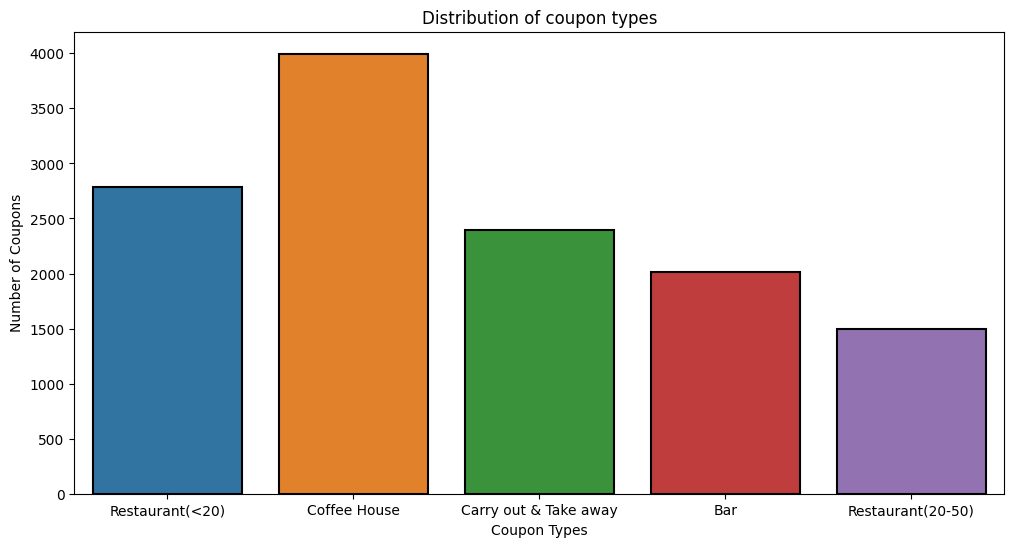

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='coupon', data=data, hue='coupon', edgecolor = 'black', linewidth = 1.5)
plt.title('Distribution of coupon types')
plt.xlabel('Coupon Types')
plt.ylabel('Number of Coupons')

6. Use a histogram to visualize the temperature column.

Text(-3.6805555555555554, 0.5, 'Observation Count')

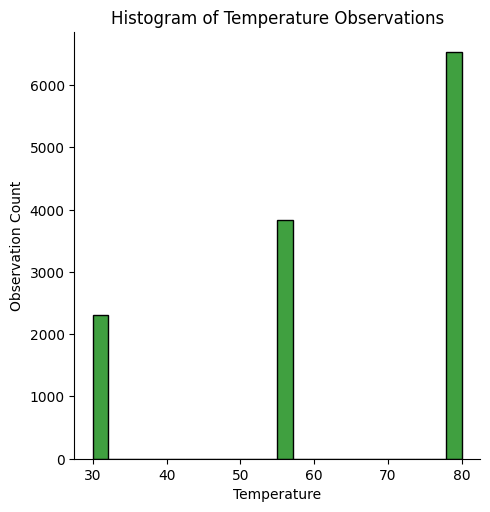

In [11]:
sns.displot(x='temperature', data=data, color='green')
plt.title('Histogram of Temperature Observations')
plt.xlabel('Temperature')
plt.ylabel('Observation Count')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
bar_df = data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [22]:
# calculate number of observations
bar_accepted = len(bar_df.query('Y == 1'))
total_accepted = len(bar_df['Y'])

# Calculate proportions
prop_bar_accepted = bar_accepted / total_accepted * 100

# Round floats
prop_bar_accepted = round(prop_bar_accepted, 2)

print(f'Percentage of bar coupon accepted: {prop_bar_accepted}%')

Percentage of bar coupon accepted: 41.0%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [16]:

# People who went to the bar three or less time and accpeted the coupon
three_or_less = bar_df.query('Bar in ["never", "less1", "1~3"] & Y == 1')

# People who went to the bar more than three times and accepted the coupon
more_than_three = bar_df.query('Bar in ["4~8", "gt8"] & Y == 1')

# Now lets compute the acceptance rates:
three_or_less_accept_rate = (len(three_or_less) / len(bar_df)) * 100

more_than_three_accept_rate = (len(more_than_three) / len(bar_df)) * 100

# Round the answers to 2 decimal places
three_or_less_accept_rate = round(three_or_less_accept_rate, 2)
more_than_three_accept_rate = round(more_than_three_accept_rate, 2)

# Print out our rates:
print(f'Percentage of acceptance with three or less bar visits: {three_or_less_accept_rate}%')
print(f'Percentage of acceptance with more than three bar visits: {more_than_three_accept_rate}%')

Percentage of acceptance with three or less bar visits: 33.02%
Percentage of acceptance with more than three bar visits: 7.59%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [26]:
# Sort our DataFrame
more_3_over_25 = bar_df.query('Bar in ["1~3", "4~8", "gt8"] & age > 25')

# Compute the specfic acceptance rate as a percentage
over_25_accept = (len(more_3_over_25[more_3_over_25['Y'] == 1]) / len(more_3_over_25)) * 100

# Computer the acceptance rate of all others
accept_rate = len(bar_df[bar_df['Y'] == 1]) / len(bar_df) * 100

# Round to 2 decimal places
accept_rate = round(accept_rate, 2)
over_25_accept = round(over_25_accept, 2)

# Print out our rates
print(f'Percentage of acceptance for more than 1 visit per month and over 25: {over_25_accept}%')
print(f'Percentafe of acceptance for everyone else: {accept_rate}%')

Percentage of acceptance for more than 1 visit per month and over 25: 69.97%
Percentafe of acceptance for everyone else: 41.0%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [51]:
# Sorting for specific group
sort1_df = bar_df.query('Bar in ["1~3", "4~8", "gt8"] & passanger not in ["Alone", "Kid(s)"] & occupation != "Farming Fishing & Forestry"')

sort1_df["Y"].value_counts()

# Acceptance rate of our specific group
sorted_rate = len(sort1_df.query('Y == 1')) / len(sort1_df['Y']) * 100

# Computer the acceptance rate of all others
accept_rate = len(bar_df[bar_df['Y'] == 1]) / len(bar_df) * 100

# round our values
sorted_rate = round(sorted_rate, 2)
accept_rate = round(accept_rate, 2)

print(f'''Percentafe of acceptance for drivers who go to bars more than once a month and had passengers
that were not a kid and had occupations other than farming, fishing, or forestry: {sorted_rate}%''')

print(f'Percentafe of acceptance for everyone else: {accept_rate}%')

Percentafe of acceptance for drivers who go to bars more than once a month and had passengers 
that were not a kid and had occupations other than farming, fishing, or forestry: 71.79%
Percentafe of acceptance for everyone else: 41.0%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [14]:
# Sort our differnt groups
group1 = bar_df.query('Bar in ["1~3", "4~8", "gt8"] & passanger not in ["Alone", "Kid(s)"] & maritalStatus != "Widowed"')
group2 = bar_df.query('Bar in ["1~3", "4~8", "gt8"] & age < 30')
group3 = data.query('RestaurantLessThan20 in ["4~8", "gt8"] and income_ranges < 5')

# Calculating the acceptance rates
group1_rate = len(group1.query('Y == 1')) / len(group1['Y']) * 100
group2_rate = len(group2.query('Y == 1')) / len(group2['Y']) * 100
group3_rate = len(group3.query('Y == 1')) / len(group3['Y']) * 100

# Rounding to 2 decimal places
group1_rate = round(group1_rate, 2)
group2_rate = round(group2_rate, 2)
group3_rate = round(group3_rate, 2)

# Printing statements:
print(f'Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {group1_rate}%')
print(f'Acceptance rate of drivers who go to bars more than once a month and are under the age of 30: {group2_rate}%')
print(f'Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {group3_rate}%')

Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 71.79%
Acceptance rate of drivers who go to bars more than once a month and are under the age of 30: 73.13%
Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 60.07%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

###Based on the following observations, we are able to make a couple of hypothesies about the drivers who chose to accept the bar coupons.

1. That they were over the age of 25. Our tests showed that when we sorted for drivers over the age of 25, our proportion of coupon acceptance rose.
2. That the passangers in the car matter, specifically whether or not they were kids. Our tests showed that when drivers had kids in the car, there acceptance rates went down by a significant amount.




### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Investigation into 'Coffee House' coupon

In [14]:
# Sort our DataFrame to just the Coffee House coupons
cof_df = data.query('coupon == "Coffee House"')
cof_df.shape

(3996, 26)

In [15]:
# Look at the percentage of coupon acceptance
Y1_num = cof_df.shape[0]
Y0_num = cof_df.query('Y == 1').shape[0]

# Calculate proportion
cof_prop = round((Y0_num / Y1_num * 100), 2)

# Percentage of coupon acceptance for coffee shop coupons
print(f'Percentage of coupon acceptance for coffee shop coupons: {cof_prop}%')

Percentage of coupon acceptance for coffee shop coupons: 49.92%


In [31]:
# Lets look at how age is effecting coffee shop coupon acceptance.
print(cof_df.query('Y == 1')['age'].mean())
print(cof_df['age'].mean())
print(cof_df.query('Y == 0')['age'].mean())

29.471049457177322
29.639259708737864
29.80952380952381


####The above code cell indicates that there is not a statstically significant differance in age between those who chose to accept the coffee coupon and those who did not. In fact, the average ages of those who accepted, and did not accept was almost identical.

In [16]:
# Lets look at what occupations were represented in the coffee shop coupons

px.histogram(cof_df, x='occupation', color='Y', barmode='group')


The above graph shows Coupon acceptance vs denial depending on the occupation. Here we can see some interesting trends. Lots of the occupations have almost idential acceptance vs denial rates, however, there are some outliers. From an earlier calculation we saw that coffee shop coupon acceptance was already below 50%, this follows in our visualization as many of the occupations show a higher rate coupon denial than acceptance. An example of this can be seen in 'Sales & Related'. On the other hand, perhaps the most interesting relationship in the chart is for the 'Student' occupation. Students are accepting the coupons at a rate around 40% higher than their denial rate.

Acceptance rate when going in same direction as coupon destination: 53.07%
Acceptance rate when going in opposite direction as coupon destination: 49.2%


Text(0.5, 1.0, 'Oppostie Direction')

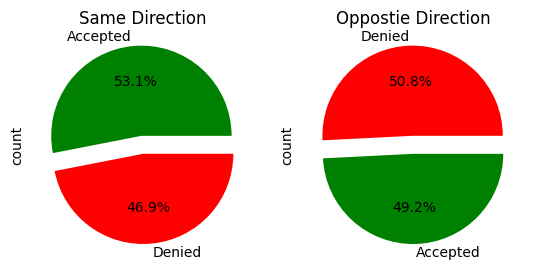

In [42]:
# Lets look at how much the direction of travel was affecting the acceptance rate.
same = cof_df.query('direction_same == 1')
opp = cof_df.query('direction_opp == 1')

# Finding the acceptance rate.
same_rate = len(same[same['Y'] == 1]) / len(same['Y']) * 100
opp_rate = len(opp[opp['Y'] == 1]) / len(opp['Y']) * 100

# Rounding to 2 decimal places.
same_rate = round(same_rate, 2)
opp_rate = round(opp_rate, 2)

# Printing Statements
print(f'Acceptance rate when going in same direction as coupon destination: {same_rate}%')
print(f'Acceptance rate when going in opposite direction as coupon destination: {opp_rate}%')

# Adding a pie chart

plt.subplot(121)
# Get value counts and rename the index
same_counts = same['Y'].value_counts()
same_counts.index = ['Accepted' if i == 1 else 'Denied' for i in same_counts.index]
same_counts.plot(kind='pie', explode=[0.1, 0.1], autopct='%1.1f%%', colors=['g', 'r'])
plt.title('Same Direction')

plt.subplot(122)
# Get value counts and rename the index
opp_counts = opp['Y'].value_counts()
opp_counts.index = ['Accepted' if i == 1 else 'Denied' for i in opp_counts.index]
opp_counts.plot(kind='pie', explode=[0.1, 0.1], autopct='%1.1f%%', colors=['r', 'g'])
plt.title('Oppostie Direction')


Interestingly we find that the direction someone is traveling does not have very much influence on their acceptance of coffee house coupons.

## Looking at things like time of day, weather, and temperature.

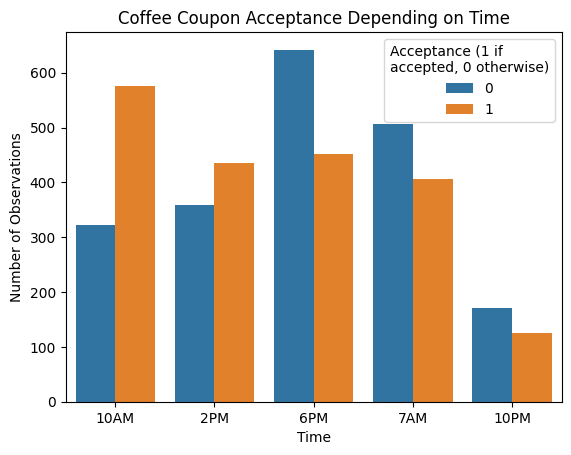

In [53]:
# First looking at time of day
cof_df['time'].unique()

# Lets make a countplot that shows the acceptance depedning on the time
sns.countplot(data=cof_df, x='time', hue='Y')
plt.title('Coffee Coupon Acceptance Depending on Time')
plt.xlabel('Time')
plt.ylabel('Number of Observations')
plt.legend(title='Acceptance (1 if \naccepted, 0 otherwise)')

This plot indicates that people are far more likely to accept the coffee coupons during the beginning of the day

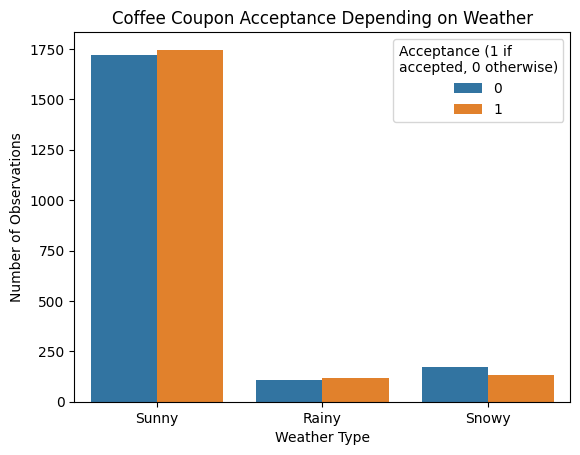

In [57]:
# Lets look at weather now
cof_df['weather'].unique()

# Histogram showing acceptance depending on the type of weather.

sns.countplot(data=cof_df, x='weather', hue='Y')
plt.title('Coffee Coupon Acceptance Depending on Weather')
plt.xlabel('Weather Type')
plt.ylabel('Number of Observations')
plt.legend(title='Acceptance (1 if \naccepted, 0 otherwise)')


Here we see little to no difference in acceptance based on type of weather.

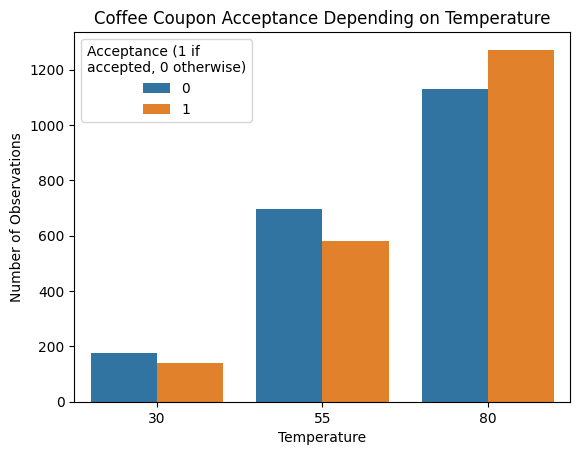

In [58]:
# Lets look at temperature now
cof_df['temperature'].unique()

# Histogram showing acceptance depending on the temperature.


sns.countplot(data=cof_df, x='temperature', hue='Y')
plt.title('Coffee Coupon Acceptance Depending on Temperature')
plt.xlabel('Temperature')
plt.ylabel('Number of Observations')
plt.legend(title='Acceptance (1 if \naccepted, 0 otherwise)')

Here we see something interesting. As the temperature was 80 degrees, the coupon acceptance rate was higher than its denial rate. At the other two observed temperatures, we observe the opposite relationship.